In [ ]:
### 데이터 사전 처리(Preprocessing)

In [1]:
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

df=pd.read_csv('교통사고_날씨.csv',encoding='CP949',index_col=0)
df

,월,주야,요일,사망자수,중상자수,사고유형,사고유형_세부,가해자법규위반,도로형태,가해자_종별,...,사망_중상자비율,부상자수,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s),최소 상대습도(%),평균 상대습도(%)
0,5,야,수,1,0,차대차,진행중 추돌,안전운전 의무 불이행,단일로,승용차,...,0.5,1,19.2,13.0,27.5,0.0,4.2,1.4,24.0,69.4
1,3,주,금,1,0,차대차,주정차중 추돌,안전운전 의무 불이행,단일로,화물차,...,0.5,1,8.7,5.8,13.3,0.5,4.3,2.0,53.0,87.5
2,10,야,금,1,1,차대차,측면직각충돌,안전운전 의무 불이행,단일로,승용차,...,0.5,2,13.6,8.3,22.7,0.0,4.2,1.0,28.0,75.6
3,6,주,목,1,0,차대차,주정차중 추돌,안전운전 의무 불이행,단일로,화물차,...,0.5,1,23.7,17.0,29.4,0.0,2.1,0.9,40.0,59.5
4,6,야,월,1,0,차대차,진행중 추돌,안전운전 의무 불이행,불명,화물차,...,0.5,1,20.5,19.7,22.5,10.5,4.2,1.2,76.0,91.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39939,12,주,금,1,0,차대차,정면충돌,안전운전 의무 불이행,교차로내,승용차,...,1.0,0,-1.9,-4.4,1.7,0.0,4.1,2.1,51.0,62.5
39940,12,주,금,1,0,차대차,추돌,안전운전 의무 불이행,단일로,화물차,...,1.0,0,-5.0,-9.7,-0.1,0.0,4.2,1.4,36.0,65.9
39941,12,야,금,1,0,차대사람,횡단중,보행자 보호의무 위반,단일로,승용차,...,1.0,0,-1.5,-3.9,2.6,0.0,5.3,3.4,13.0,22.9
39942,12,야,금,1,0,차대사람,횡단중,보행자 보호의무 위반,교차로내,승용차,...,1.0,0,-5.8,-7.9,-3.0,0.0,5.7,3.1,28.0,35.6


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39944 entries, 0 to 39943
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   월           39944 non-null  int64  
 1   주야          39944 non-null  object 
 2   요일          39944 non-null  object 
 3   사망자수        39944 non-null  int64  
 4   중상자수        39944 non-null  int64  
 5   사고유형        39944 non-null  object 
 6   사고유형_세부     39944 non-null  object 
 7   가해자법규위반     39944 non-null  object 
 8   도로형태        39944 non-null  object 
 9   가해자_종별      39944 non-null  object 
 10  피해자_종별      39944 non-null  object 
 11  시군          39944 non-null  object 
 12  시군_날씨       39944 non-null  object 
 13  총인수         39944 non-null  int64  
 14  사망_중상자비율    39944 non-null  float64
 15  부상자수        39944 non-null  int64  
 16  평균기온(°C)    39944 non-null  float64
 17  최저기온(°C)    39944 non-null  float64
 18  최고기온(°C)    39944 non-null  float64
 19  일강수량(mm)    39944 non-nul

In [3]:
df.isnull().sum()

월             0
주야            0
요일            0
사망자수          0
중상자수          0
사고유형          0
사고유형_세부       0
가해자법규위반       0
도로형태          0
가해자_종별        0
피해자_종별        0
시군            0
시군_날씨         0
총인수           0
사망_중상자비율      0
부상자수          0
평균기온(°C)      0
최저기온(°C)      0
최고기온(°C)      0
일강수량(mm)      0
최대 풍속(m/s)    0
평균 풍속(m/s)    0
최소 상대습도(%)    0
평균 상대습도(%)    0
dtype: int64

In [4]:
# for i, d in enumerate(df['사망_중상자비율']):
#     df.iloc[i,-10]=round(d,2)

In [5]:
# df.to_csv('교통사고_날씨.csv',encoding='CP949')

In [6]:
df['월']=df['월'].astype(str)

In [7]:
df.columns

Index(['월', '주야', '요일', '사망자수', '중상자수', '사고유형', '사고유형_세부', '가해자법규위반', '도로형태',
       '가해자_종별', '피해자_종별', '시군', '시군_날씨', '총인수', '사망_중상자비율', '부상자수',
       '평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '일강수량(mm)', '최대 풍속(m/s)',
       '평균 풍속(m/s)', '최소 상대습도(%)', '평균 상대습도(%)'],
      dtype='object')

In [8]:
# 2. 데이터 전처리
# 3. EDA
# 4. 조건 데이터(x)와 예측 대상(y, target)으로 분리

In [9]:
y=df['사망_중상자비율']
x=df.drop(['사망_중상자비율','사망자수','중상자수','총인수','부상자수',\
           '최저기온(°C)', '최고기온(°C)','최대 풍속(m/s)', '최소 상대습도(%)',\
          '시군', '시군_날씨'],axis=1)

In [10]:
x['사고유형_세부'].value_counts()

for i,q in enumerate(x['사고유형_세부']):
    if q =='도로이탈 기타':
        x.iloc[i,4] = '도로이탈 추락'
    elif q =='전복':
        x.iloc[i,4] = '전도전복'
    elif q =='전도':
        x.iloc[i,4] = '전도전복'
    elif q =='보도통행중':
        x.iloc[i,4] = '횡단중'
    elif q =='후진중충돌':
        x.iloc[i,4] = '추돌'
    elif q =='측면직각충돌':
        x.iloc[i,4] = '측면충돌'
    elif q =='길가장자리구역통행중':
        x.iloc[i,4] = '차도통행중'
    elif q in ['경보기 무시', '직전진행','차단기돌파', '철길건널목']:
        x.iloc[i,4] = '기타'
    elif q =='주/정차차량 충돌':
        x.iloc[i,4] = '주정차중 추돌'
    elif q in ['주정차중 추돌', '진행중 추돌']:
        x.iloc[i,4] = '추돌'
    elif q == '정면충돌':
        x.iloc[i,4] = '추돌'
    elif q in ['도로이탈 추락', '전도전복']:
        x.iloc[i,4] = '전복 및 추락'
    elif q in ['횡단중', '차도통행중']:
        x.iloc[i,4] = '횡단 및 차도통행중'
        
print(x['사고유형_세부'].value_counts())

횡단 및 차도통행중    9895
기타            9214
추돌            6835
측면충돌          5568
공작물충돌         3834
전복 및 추락       2491
차도통행중          688
전도전복           658
횡단중            418
도로이탈 추락        319
주정차중 추돌         24
Name: 사고유형_세부, dtype: int64


In [11]:
for i,q in enumerate(x['가해자법규위반']):
    if q in ['과로', '긴급자동차에대한 피양의무 위반','보행자과실', '진로양보 의무 불이행','통행우선 순위위반','철길건널목 통과방법위반','정비불량 제차의 운전금지위반','기타(운전자법규위반)']:
        x.iloc[i,5] = '기타'
    elif q in ['앞지르기 금지위반', '서행 및 일시정지위반', '앞지르기 방법위반' ]:
        x.iloc[i,5] = '안전거리 미확보'
    elif q in ['부당한 회전' ]:
        x.iloc[i,5] = '교차로 통행방법 위반'
    elif q in ['차로위반(진로변경 위반)' ]:
        x.iloc[i,5] = '중앙선 침범'

        
print(x['가해자법규위반'].value_counts())

안전운전 의무 불이행        27873
신호위반                3151
중앙선 침범              3078
과속                  1610
보행자 보호의무 위반         1465
기타                   890
교차로 통행방법 위반          806
안전거리 미확보             784
직진 및 우회전차의 통행방해      287
Name: 가해자법규위반, dtype: int64


In [12]:
for i,q in enumerate(x['도로형태']):
    if q in [ '철길건널목']:
        x.iloc[i,6] = '건널목'
    elif q in ['주차장', '불명','건널목' ]:
        x.iloc[i,6] = '기타'
    elif q in ['교량위' , '고가도로위']:
        x.iloc[i,6] = '교량 및 고가도로위'
    elif q in ['터널안', '지하도로내' ]:
        x.iloc[i,6] = '터널 및 지하도로'

        
print(x['도로형태'].value_counts())

단일로           23486
교차로내           8424
교차로부근          4247
횡단보도부근         1268
기타             1230
교량 및 고가도로위      696
터널 및 지하도로       587
건널목               6
Name: 도로형태, dtype: int64


In [13]:
for i,q in enumerate(x['가해자_종별']):
    if q in [ '사륜오토바이(ATV)','개인형이동수단(PM)']:
        x.iloc[i,7] = 'ATV 및 PM'
    elif q in ['불명' ]:
        x.iloc[i,7] = '기타'
    elif q in ['원동기장치자전거' ]:
        x.iloc[i,7] = '이륜차'

print(x['가해자_종별'].value_counts())

승용차         19371
화물차          9140
이륜차          5421
승합차          2726
자전거           963
건설기계          913
농기계           683
특수차           424
ATV 및 PM      228
기타             75
Name: 가해자_종별, dtype: int64


In [14]:
for i,q in enumerate(x['피해자_종별']):
    if q in [ '사륜오토바이(ATV)','개인형이동수단(PM)','열차','불명']:
        x.iloc[i,8] = '기타'
    elif q in ['특수차' ]:
        x.iloc[i,8] = '기타'
    elif q in ['원동기장치자전거' ]:
        x.iloc[i,8] = '이륜차'

print(x['피해자_종별'].value_counts())

보행자     15391
기타       9047
승용차      5157
화물차      3913
이륜차      2703
자전거      1472
승합차      1092
건설기계      591
농기계       578
Name: 피해자_종별, dtype: int64


In [15]:
x=pd.get_dummies(x)

In [16]:
x

,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),월_1,월_10,월_11,월_12,월_2,월_3,...,가해자_종별_화물차,피해자_종별_건설기계,피해자_종별_기타,피해자_종별_농기계,피해자_종별_보행자,피해자_종별_승용차,피해자_종별_승합차,피해자_종별_이륜차,피해자_종별_자전거,피해자_종별_화물차
0,19.2,0.0,1.4,69.4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,8.7,0.5,2.0,87.5,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
2,13.6,0.0,1.0,75.6,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,23.7,0.0,0.9,59.5,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,20.5,10.5,1.2,91.6,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39939,-1.9,0.0,2.1,62.5,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
39940,-5.0,0.0,1.4,65.9,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
39941,-1.5,0.0,3.4,22.9,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
39942,-5.8,0.0,3.1,35.6,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [17]:
### 선형 회귀 모델의 학습/예측/평가

In [23]:
def get_rmse(model):
    pred = model.predict(x_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0}  RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [24]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(x_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(x_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)


LinearRegression  RMSE: 0.211
Ridge  RMSE: 0.211
Lasso  RMSE: 0.224


[0.21063140772098485, 0.21062851432686963, 0.2244744051878956]

In [25]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=x.columns)
    
    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low


C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48512 (\N{

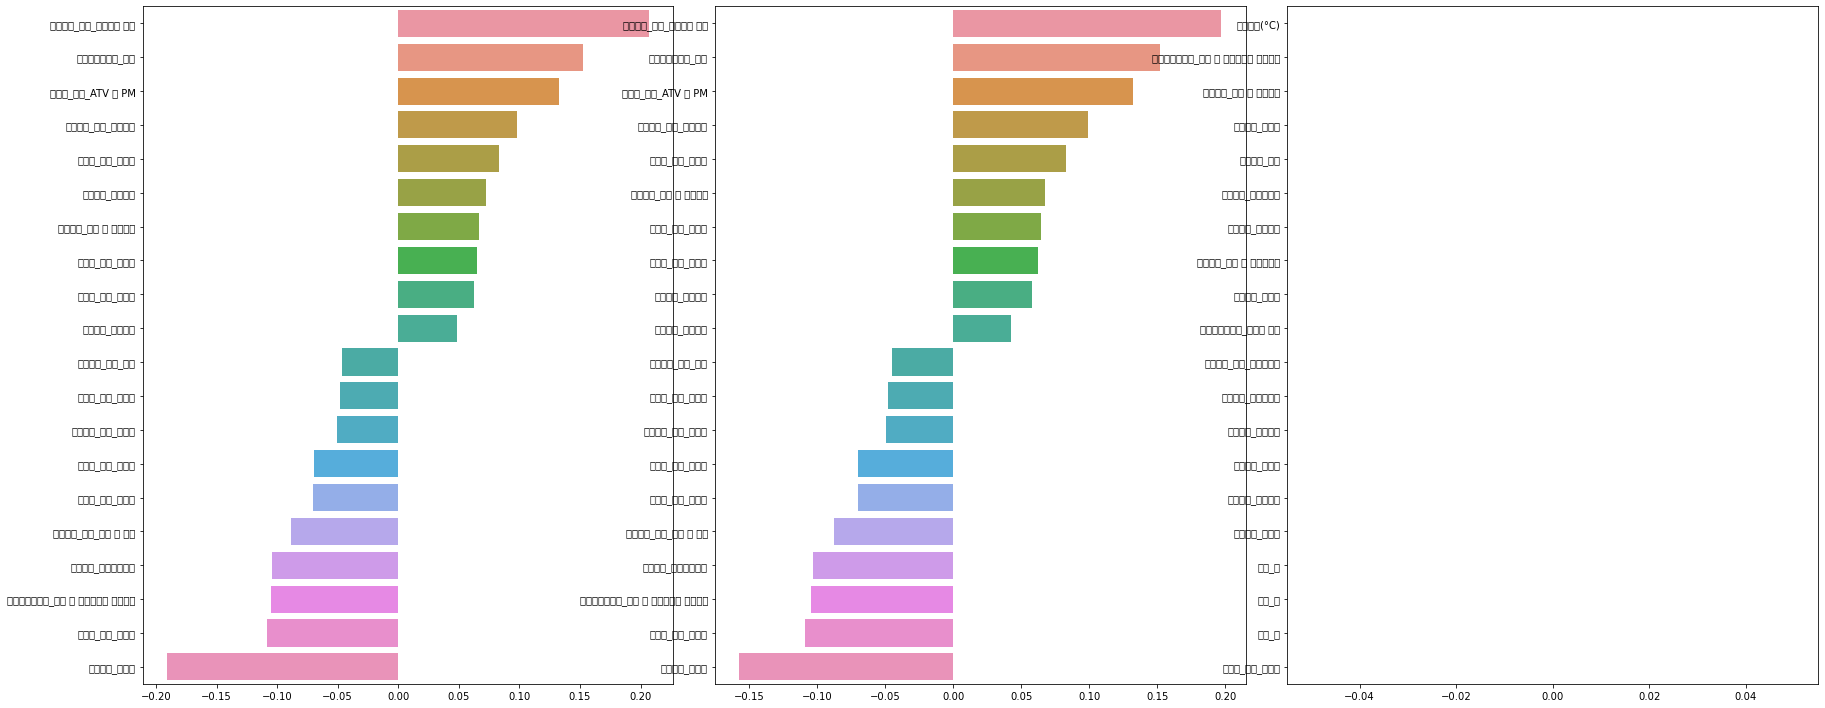

In [26]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
#         axs[i_num].tick_params(axis="y",direction="in", pad=-120)
#         for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
#             label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.    
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)


In [27]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, x,y,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력           
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [1.37000000e-01 1.40000000e-01 6.57546465e+07 2.09000000e-01
 4.54000000e-01]
LinearRegression CV 평균 RMSE 값: 13150929.483

Ridge CV RMSE 값 리스트: [0.137 0.14  0.142 0.209 0.454]
Ridge CV 평균 RMSE 값: 0.216

Lasso CV RMSE 값 리스트: [0.142 0.14  0.145 0.193 0.464]
Lasso CV 평균 RMSE 값: 0.217


In [28]:
#### 하이퍼 파라미터 튜닝

In [29]:
# grid = GridSearchCV(model, param_grid = params, cv=3)
# grid.fit(x_train, y_train)

# grid.best_score_
# grid.best_params_
# grid.best_estimator_
# grid.cv_results_

In [30]:

from sklearn.model_selection import GridSearchCV  # randomsearch, 베이지안 최적화

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(x,y)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_  # gridsearch로 학습된 최상의 모델

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }

best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.2479, 최적 alpha:{'alpha': 20}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.2475, 최적 alpha:{'alpha': 0.001}


LinearRegression  RMSE: 0.211
Ridge  RMSE: 0.211
Lasso  RMSE: 0.213


C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48512 (\N{

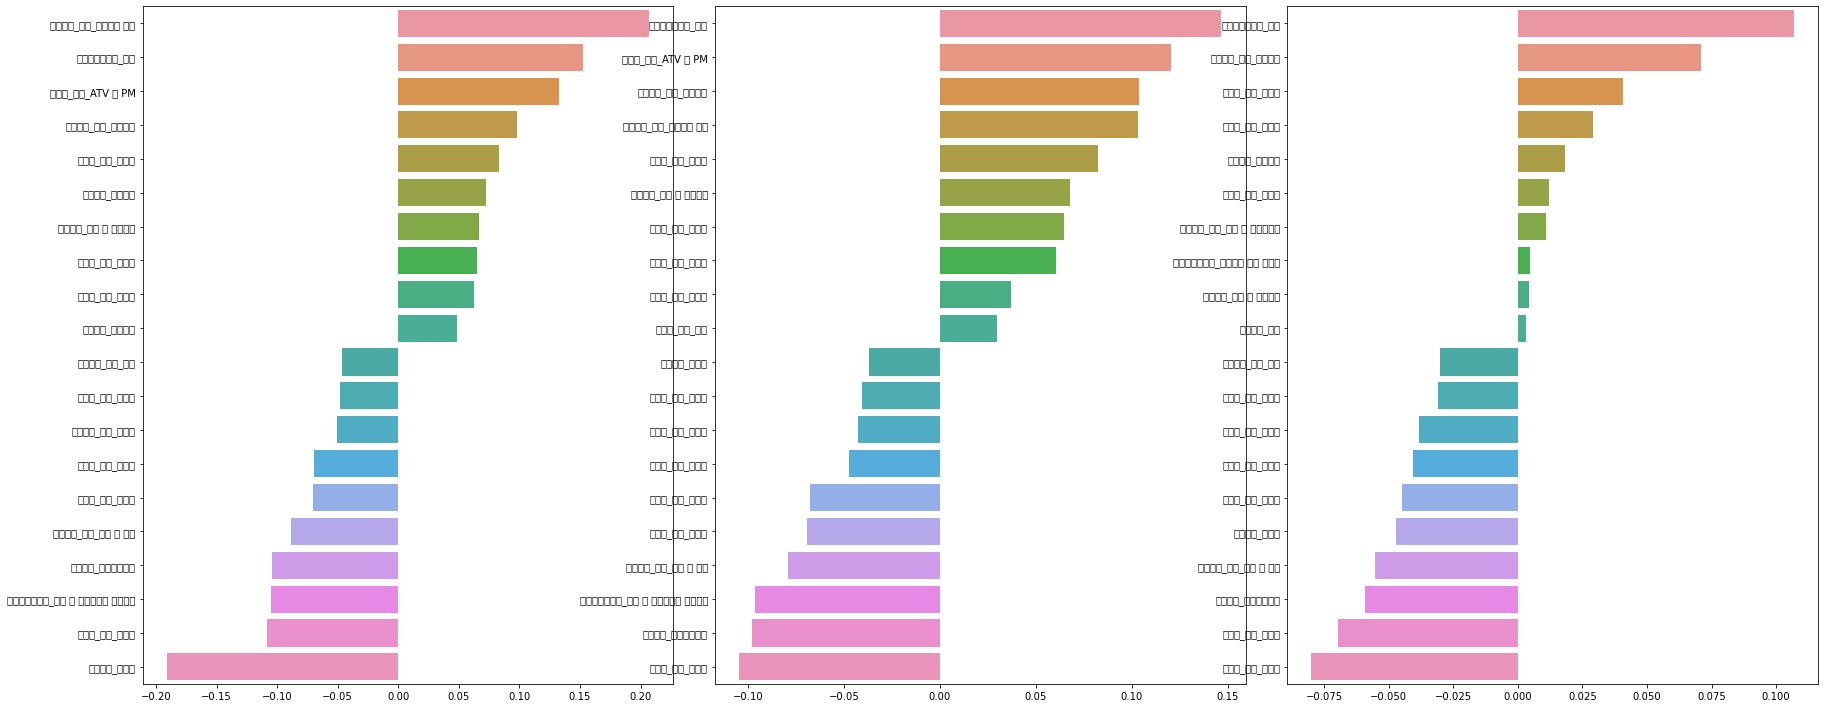

In [31]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)
ridge_reg = Ridge(alpha=20)
ridge_reg.fit(x_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [32]:
from scipy.stats import skew
# skew : 왜도를 측정하는 함수, 왜도 - 데이터가 한쪽으로 쏠림 정도를 측정하는 함수..

# object가 아닌 숫자형 피쳐의 컬럼 index 객체 추출.
features_index = df.dtypes[df.dtypes != 'object'].index

# house_df에 컬럼 index를 [ ]로 입력하면 해당하는 컬럼 데이터 셋 반환. apply lambda로 skew( )호출 
# 숫자로 된 칼럼들의 왜도를 계산
skew_features = df[features_index].apply(lambda x : skew(x))

# skew 정도가 1 이상인 컬럼들만 추출. 
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))  # 데이터의 쏠림이 심한 칼럼..

부상자수          18.861039
총인수           15.292163
중상자수          13.881351
사망자수           9.987514
일강수량(mm)       7.240418
평균 풍속(m/s)     1.633337
최대 풍속(m/s)     1.291320
dtype: float64


In [33]:
# 왜도가 심한(> 1) 칼럼들을 log함수를 통해서 좌우 대칭형으로 변환
# log() : 큰 값을 작게, 작은 값은 사이를 벌려서 좌우 대칭되게 만든다..
df[skew_features_top.index] = np.log1p(df[skew_features_top.index])

In [34]:
from scipy.stats import skew

# object가 아닌 숫자형 피쳐의 컬럼 index 객체 추출.
features_index = df.dtypes[df.dtypes != 'object'].index
# house_df에 컬럼 index를 [ ]로 입력하면 해당하는 컬럼 데이터 셋 반환. apply lambda로 skew( )호출 
skew_features = df[features_index].apply(lambda x : skew(x))
# skew 정도가 1 이상인 컬럼들만 추출. 
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

사망자수        6.823203
중상자수        2.824785
일강수량(mm)    2.200133
총인수         1.850936
부상자수        1.241744
dtype: float64


In [35]:
# Skew가 높은 피처들을 로그 변환 했으므로 다시 원-핫 인코딩 적용 및 피처/타겟 데이터 셋 생성,
df_ohe = df
y=df_ohe['사망_중상자비율']
x=df_ohe.drop(['사망_중상자비율','사망자수','중상자수','총인수','부상자수',\
           '최저기온(°C)', '최고기온(°C)','최대 풍속(m/s)', '최소 상대습도(%)',\
          '시군', '시군_날씨'],axis=1)
x=pd.get_dummies(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=156)

# 피처들을 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.2449, 최적 alpha:{'alpha': 0.1}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.248, 최적 alpha:{'alpha': 0.001}


LinearRegression  RMSE: 0.2
Ridge  RMSE: 0.2
Lasso  RMSE: 0.204


C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44060 (\

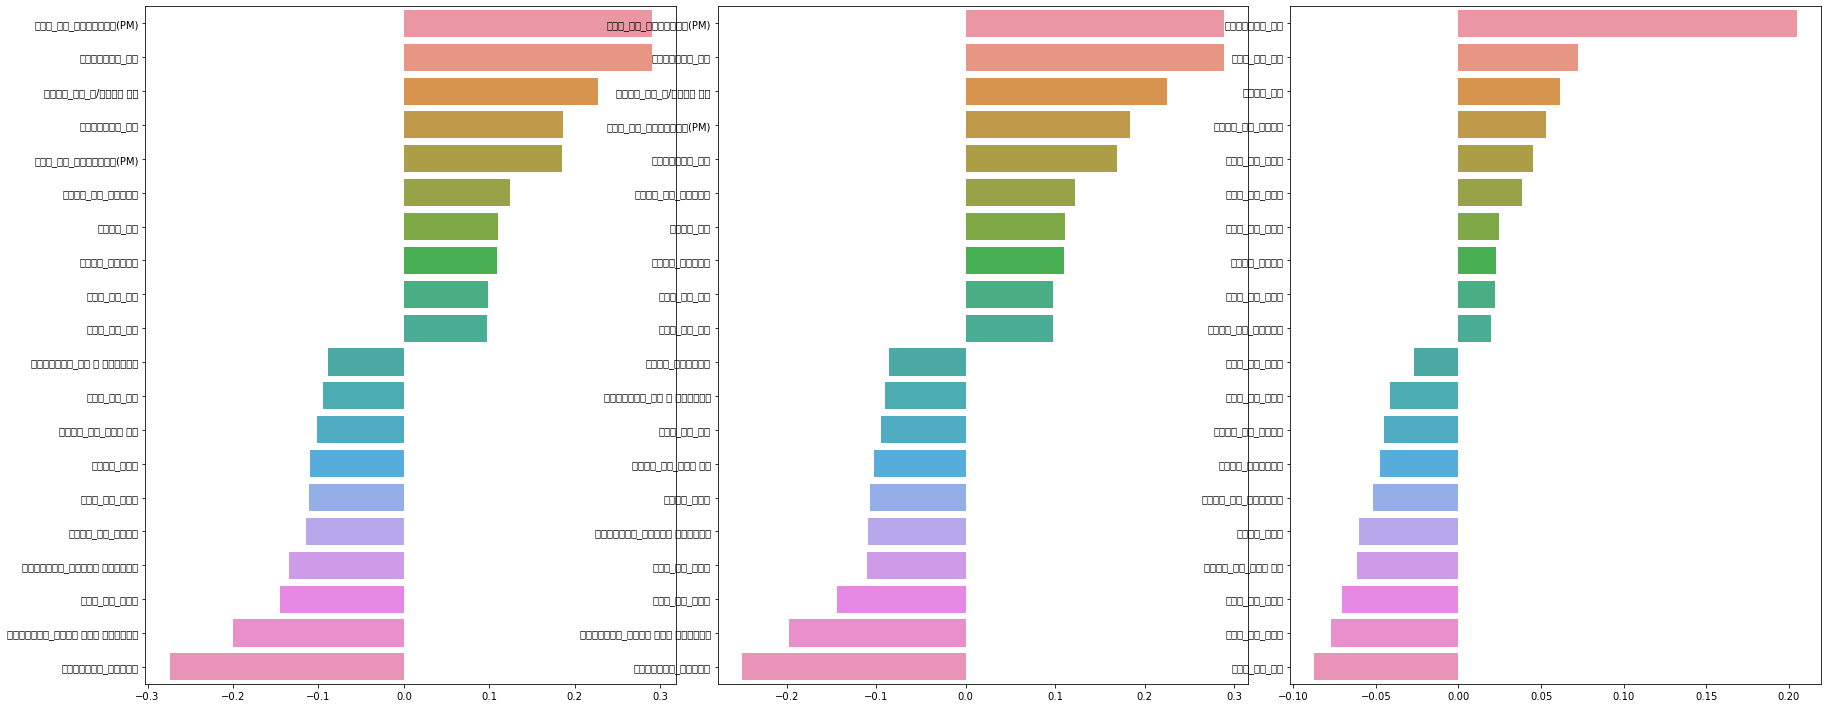

In [36]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(x_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)


# skew가 큰 칼럼들을 log로 변환한 후 lasso의 값이 개선..

In [37]:
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [38]:
# 이상치제거 -- 이 부분 잘 안 되는 듯

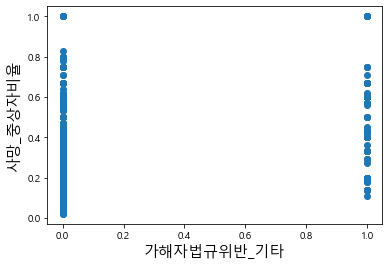

In [39]:
plt.scatter(x = x['가해자법규위반_기타'], y = df['사망_중상자비율'])
plt.ylabel('사망_중상자비율', fontsize=15)
plt.xlabel('가해자법규위반_기타', fontsize=15)
plt.show()

In [35]:
# # GrLivArea와 SalePrice 모두 로그 변환되었으므로 이를 반영한 조건 생성. 
# cond1 = df_ohe['가해자법규위반_기타'] > np.log1p(4000)
# cond2 = df_ohe['사망_중상자비율'] < np.log1p(0.8)
# outlier_index = df_ohe[cond1 & cond2].index

# print('아웃라이어 레코드 index :', outlier_index.values)
# print('아웃라이어 삭제 전 house_df_ohe shape:', house_df_ohe.shape)
# # DataFrame의 index를 이용하여 아웃라이어 레코드 삭제. 
# house_df_ohe.drop(outlier_index , axis=0, inplace=True)
# print('아웃라이어 삭제 후 house_df_ohe shape:', house_df_ohe.shape)

In [36]:
### 회귀 트리 학습/예측/평가 

In [40]:
import xgboost
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.2498, 최적 alpha:{'n_estimators': 1000}


In [41]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = print_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.2445, 최적 alpha:{'n_estimators': 1000}


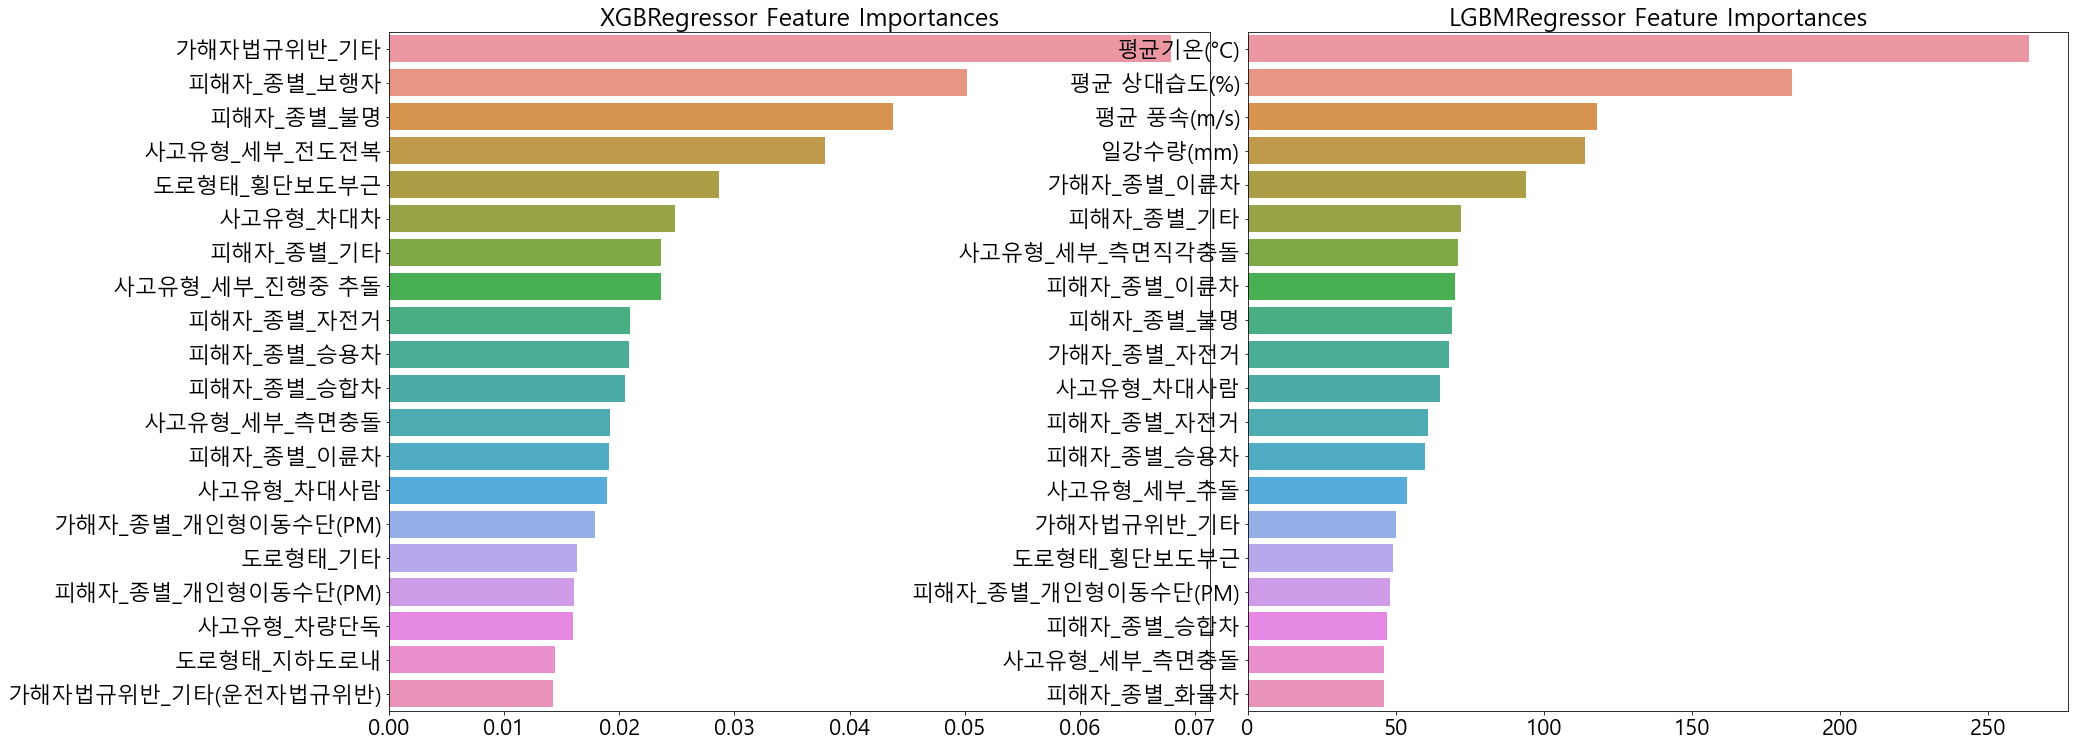

In [42]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=x.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# 앞 예제에서 print_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화    
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)

In [40]:
### 회귀 모델들의 예측 결과 혼합을 통한 최종 예측

In [43]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

# 개별 모델의 학습
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(x_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)
# 개별 모델 예측
ridge_pred = ridge_reg.predict(x_test)
lasso_pred = lasso_reg.predict(x_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 * lasso_pred    # ridge, lasso 결과값 가중평균으로 예측
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}
#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_rmse_pred(preds)


최종 혼합 모델의 RMSE: 0.20173454159365095
Ridge 모델의 RMSE: 0.20035215796534445
Lasso 모델의 RMSE: 0.20376183327812009


In [44]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(x_train, y_train)
lgbm_reg.fit(x_train, y_train)
xgb_pred = xgb_reg.predict(x_test)
lgbm_pred = lgbm_reg.predict(x_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred  # xgboost, lgbm 가중평균값으로 예측
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}
        
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.19509236349183512
XGBM 모델의 RMSE: 0.1949008719676352
LGBM 모델의 RMSE: 0.19793847843247134


In [43]:
### 스태킹 모델을 통한 회귀 예측

In [45]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, x_train_n, y_train_n, x_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=0)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((x_train_n.shape[0] ,1 ))
    test_pred = np.zeros((x_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(x_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = x_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = x_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(x_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [46]:
# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환. 
x_train_n = x_train.values
x_test_n = x_test.values
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환. 
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, x_train_n, y_train_n, x_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, x_train_n, y_train_n, x_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, x_train_n, y_train_n, x_test_n, 5)  
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, x_train_n, y_train_n, x_test_n, 5)



Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
LGBMRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 


In [47]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.  
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, 
                                      xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, 
                                     xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용. 
meta_model_lasso = Lasso(alpha=0.0005)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test , final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.19486292675945058
